In [1]:
import cx_Oracle
conn=cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor=conn.cursor()
cursor.execute('select * from ontime where rownum < 5')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(2008, 1, 3, 4, '1556', 1455, '1704', 1600, 'WN', '354', 'N496WN', '68', '65', '41', '64', '61', 'LAS', 'LAX', '236', '9', '18', '0', None, '0', '61', '0', '3', '0', '0')
(2008, 1, 3, 4, '1254', 1250, '1404', 1355, 'WN', '784', 'N401WN', '70', '65', '43', '9', '4', 'LAS', 'LAX', '236', '7', '20', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '840', 840, '946', 945, 'WN', '790', 'N351SW', '66', '65', '43', '1', '0', 'LAS', 'LAX', '236', '11', '12', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '1540', 1525, '1648', 1630, 'WN', '1061', 'N422WN', '68', '65', '47', '18', '15', 'LAS', 'LAX', '236', '5', '16', '0', None, '0', '10', '0', '3', '0', '5')


In [2]:
# 항공사별 출발 지연 시간 평균
import cx_Oracle
conn=cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor=conn.cursor()
cursor.execute('select uniquecarrier,avg(depdelay) from ontime group by uniquecarrier')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

WN	10.276262862449386
OO	7.2952999070807305
DL	7.887967410954327
B6	12.447679903718171
CO	13.023581444438861
HA	0.4510561899524472
OH	11.16054087152783
AQ	-1.3902564102564103
9E	6.5856228642909445
NW	6.409786223004613
AA	12.899916513056201
AS	6.752723325965242
UA	13.784372045426737
FL	9.183920300820837
MQ	10.29978622071234
EV	11.711389111645728
YV	11.572015847487545
XE	11.093709113241301
US	5.635456327203702
F9	5.901056786616821


In [3]:
# 항공사별 도착 지연 시간 평균
import cx_Oracle
conn=cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor=conn.cursor()
cursor.execute('select uniquecarrier,avg(arrdelay) from ontime group by uniquecarrier')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

WN	5.115703380225903
OO	6.43893863978179
DL	7.716164635751918
B6	10.859381613638567
CO	10.809820575966226
HA	1.2518519716624075
OH	11.404110178283158
AQ	-2.8708974358974357
9E	3.987490846961191
NW	7.293465879672776
AA	12.202853434950445
AS	4.721360405553864
UA	11.001550560048052
FL	8.988157472371256
MQ	9.496970610952266
EV	10.00033146217589
YV	11.322566979170753
XE	10.320298523403915
US	2.800998260539828
F9	6.084135669681085


In [7]:
# 2008년 도착 지연 횟수 월별 집계
import cx_Oracle
conn=cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor=conn.cursor()
cursor.execute('select month, count(*) from ontime where arrdelay>0 group by month order by month')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 279427)
(2, 278902)
(3, 294556)
(4, 256142)
(5, 254673)
(6, 295897)
(7, 264630)
(8, 239737)
(9, 169959)
(10, 183582)
(11, 181506)
(12, 280493)


In [8]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])

print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


<BarContainer object of 12 artists>

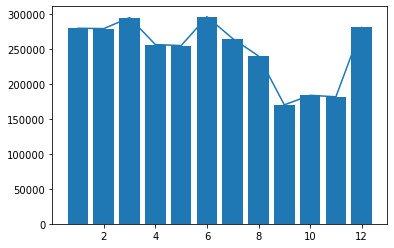

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)

In [10]:
# 요일별 평균 지연 시간
import cx_Oracle
conn=cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor=conn.cursor()
cursor.execute('select dayofweek,avg(arrdelay) from ontime group by dayofweek order by dayofweek')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 8.030254747872275)
(2, 7.29232332960935)
(3, 6.379804071503802)
(4, 8.246549198623555)
(5, 10.675214410055972)
(6, 5.682499626837823)
(7, 9.294087238339747)


In [11]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[8.030254747872275, 7.29232332960935, 6.379804071503802, 8.246549198623555, 10.675214410055972, 5.682499626837823, 9.294087238339747]


<BarContainer object of 7 artists>

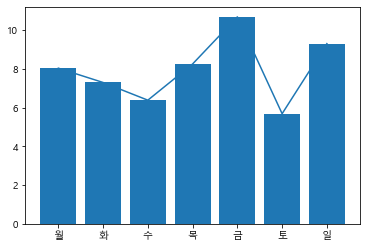

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

plt.plot(x,y)
plt.bar(x,y)

In [14]:
# 시간대별 (10월, 월요일에 출발할 때 가장 좋은 시간대)
import cx_Oracle
conn=cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor=conn.cursor()
cursor.execute(''' select *
from (
    select rownum as rn, A.*
    from (
    select CRSDepTime,avg(arrdelay) arrdelay
    from ontime
    where month=10 and dayofweek=1
    group by CRSDepTime
    order by arrdelay
    ) A
    ) where rn between 1 and 5
    ''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 2202, -28)
(2, 2216, -22.25)
(3, 1807, -20)
(4, 2154, -17.666666666666668)
(5, 1948, -16)
